In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import math
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)
pd.options.mode.chained_assignment = None


# read the dataset
df = pd.read_csv('movies.csv',delimiter=',')
#pd.set_option('display.max_rows',20)

df

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,More to Life,NaN,Drama,2020,"October 23, 2020 (United States)",3.1,18.0,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,7000.0,NaN,NaN,90.0
7664,Dream Round,NaN,Comedy,2020,"February 7, 2020 (United States)",4.7,36.0,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,NaN,NaN,Cactus Blue Entertainment,90.0
7665,Saving Mbango,NaN,Drama,2020,"April 27, 2020 (Cameroon)",5.7,29.0,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,58750.0,NaN,Embi Productions,NaN
7666,It's Just Us,NaN,Drama,2020,"October 1, 2020 (United States)",NaN,NaN,James Randall,James Randall,Christina Roz,United States,15000.0,NaN,NaN,120.0


In [2]:
# Check for the missing data
for col in df:
    percentage_missing = np.mean(df[col].isnull())
    print(percentage_missing,col)
df[df['budget'].isna()]['budget']


0.0 name
0.010041731872717789 rating
0.0 genre
0.0 year
0.0002608242044861763 released
0.0003912363067292645 score
0.0003912363067292645 votes
0.0 director
0.0003912363067292645 writer
0.00013041210224308815 star
0.0003912363067292645 country
0.2831246739697444 budget
0.02464788732394366 gross
0.002217005738132499 company
0.0005216484089723526 runtime


16     NaN
19     NaN
24     NaN
25     NaN
26     NaN
        ..
7657   NaN
7659   NaN
7660   NaN
7664   NaN
7667   NaN
Name: budget, Length: 2171, dtype: float64

In [3]:
print('num of columns before -> ',len(df.index))
df = df.dropna()
for col in df:
    percentage_missing = np.mean(df[col].isnull())
    print(percentage_missing,col)
print('num of columns -> ',len(df.index))

num of columns before ->  7668
0.0 name
0.0 rating
0.0 genre
0.0 year
0.0 released
0.0 score
0.0 votes
0.0 director
0.0 writer
0.0 star
0.0 country
0.0 budget
0.0 gross
0.0 company
0.0 runtime
num of columns ->  5421


In [4]:
# Let's glimpse at the df
print(df.dtypes)

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object


In [5]:
# some of columns with float64 type actually could be int64
df['gross'] = df['gross'].astype('int64')
df['runtime'] = df['runtime'].astype('int64')
df['votes'] = df['votes'].astype('int64')
df['budget'] = df['budget'].astype('int64')
df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes         int64
director     object
writer       object
star         object
country      object
budget        int64
gross         int64
company      object
runtime       int64
dtype: object

In [6]:
def is_numeric(row):
    try:
        int(row)
        return True
    except:
        return False
df['year'] = df['released'].apply(lambda x: x.split(',')[-1][1:5])
df['conversion_int'] = df['year'].apply(lambda x: is_numeric(x))

print(df[df['conversion_int']!=True][['conversion_int','year','released']])
df.loc[df['conversion_int']!=True,'year'] = df['released'].apply(lambda x: x.split(' ')[1])
print(df[df['conversion_int']!=True][['conversion_int','year','released']])

# Now we can easily convert the entire column to int64 type 

df['year'] = df['year'].astype('int64')
df.drop('conversion_int',axis='columns')
df.dtypes

      conversion_int  year                        released
449            False  ugus     August 1983 (United States)
467            False  arch      March 1985 (United States)
1212           False  ay 1       May 1988 (United Kingdom)
1404           False  ay 1        May 1988 (United States)
1819           False  anua    January 1991 (United States)
2029           False  ovem   November 1991 (United States)
2318           False  epte  September 1994 (United States)
2319           False  ay 1        May 1994 (United States)
5833           False  ovem       November 2010 (Australia)
      conversion_int  year                        released
449            False  1983     August 1983 (United States)
467            False  1985      March 1985 (United States)
1212           False  1988       May 1988 (United Kingdom)
1404           False  1988        May 1988 (United States)
1819           False  1991    January 1991 (United States)
2029           False  1991   November 1991 (United State

name               object
rating             object
genre              object
year                int64
released           object
score             float64
votes               int64
director           object
writer             object
star               object
country            object
budget              int64
gross               int64
company            object
runtime             int64
conversion_int       bool
dtype: object

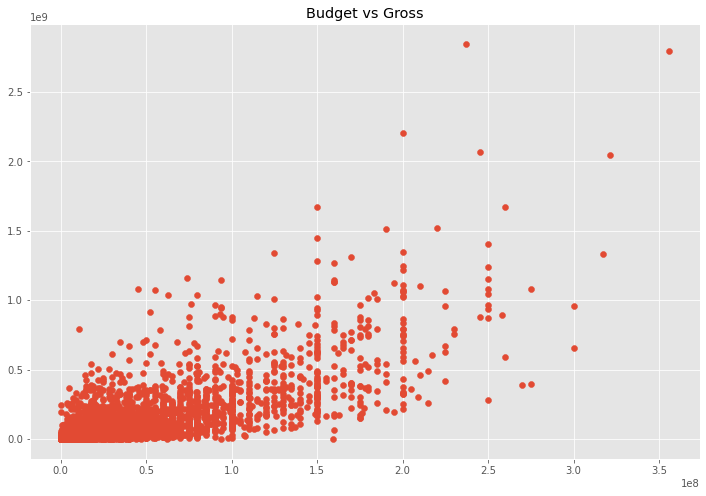

In [7]:
# Scatter plot budget and gross
plt.title('Budget vs Gross')
plt.scatter(df['budget'],df['gross'])

<AxesSubplot:xlabel='budget', ylabel='gross'>

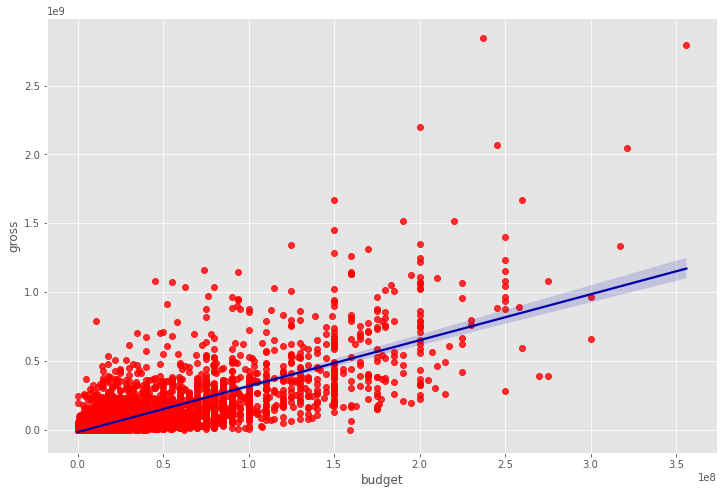

In [13]:
# Check the correlation using regression line of best fit
sns.regplot(x='budget',y='gross',data=df,scatter_kws={"color": "red"}, line_kws={"color": "#0000AA"})

In [23]:
print(df.corr().unstack())
df.corr()
# Pretty high correlation budget to gross around 0.74

year            year              1.000000
                score             0.025260
                votes             0.070181
                budget            0.104559
                gross             0.086223
                runtime           0.031091
                conversion_int    0.009347
score           year              0.025260
                score             1.000000
                votes             0.474256
                budget            0.072001
                gross             0.222556
                runtime           0.414068
                conversion_int    0.013801
votes           year              0.070181
                score             0.474256
                votes             1.000000
                budget            0.439675
                gross             0.614751
                runtime           0.352303
                conversion_int    0.023653
budget          year              0.104559
                score             0.072001
           

,year,score,votes,budget,gross,runtime,conversion_int
year,1.000000,0.025260,0.070181,0.104559,0.086223,0.031091,0.009347
score,0.025260,1.000000,0.474256,0.072001,0.222556,0.414068,0.013801
votes,0.070181,0.474256,1.000000,0.439675,0.614751,0.352303,0.023653
budget,0.104559,0.072001,0.439675,1.000000,0.740247,0.318695,0.031132
gross,0.086223,0.222556,0.614751,0.740247,1.000000,0.275796,0.022331
runtime,0.031091,0.414068,0.352303,0.318695,0.275796,1.000000,0.013601
conversion_int,0.009347,0.013801,0.023653,0.031132,0.022331,0.013601,1.000000


Text(0.5, 1.0, 'Finding correlation in our dataframe')

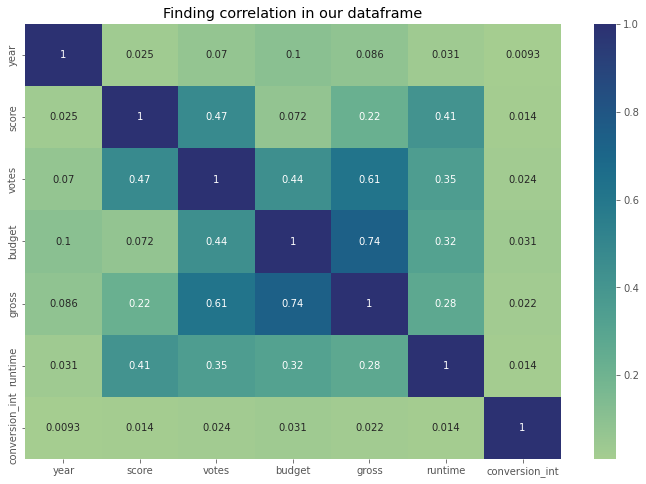

In [21]:
# Plot correlation 
df = df.sort_values(by='gross',ascending=False,axis=0)

sns.heatmap(df.corr(),annot=True,cmap='crest')
plt.title('Finding correlation in our dataframe')


In [ ]:
df_numerized = df
